In [1]:
IMG_SHAPE=(28, 28, 1)
Z_DIM = 100

In [2]:
from data_generator import *

x_data = get_fashion_mnist()
x_data.shape

(60000, 28, 28, 1)

In [3]:
from build_models import *

builder = BuildModel(IMG_SHAPE, Z_DIM)
encoder = builder.build_encoder()
decoder = builder.build_decoder()

In [4]:
from vae import *

model = VAE(encoder, decoder, IMG_SHAPE)
model.compile()
model.vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vae_inputs (InputLayer)      [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 1178152   
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         1128289   
Total params: 2,306,441
Trainable params: 2,306,441
Non-trainable params: 0
_________________________________________________________________


* 1 / 3 : loss: 195890.609375, v_loss: 44192.750000


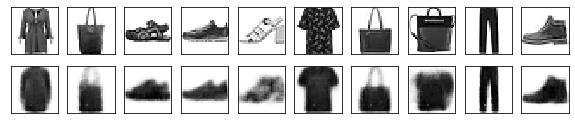

* 2 / 3 : loss: 172881.312500, v_loss: 42866.386719


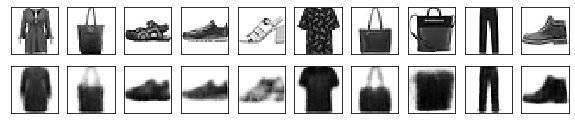

* 3 / 3 : loss: 168723.968750, v_loss: 41923.750000


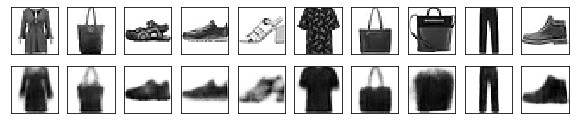

In [5]:
history = model.train( x_data
                     , batch_size=64
                     , epochs=3
                     , valid_split=0.2)